<a href="https://colab.research.google.com/github/yashvi-goyal04/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Yashvi Goyal
22BCE3019


Choice of Fishing Mode

Import the required libraries and the dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore



# URL of the CSV file
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Fishing.csv'

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())


   rownames     mode    price   catch   pbeach    ppier    pboat  pcharter  \
0         1  charter  182.930  0.5391  157.930  157.930  157.930   182.930   
1         2  charter   34.534  0.4671   15.114   15.114   10.534    34.534   
2         3     boat   24.334  0.2413  161.874  161.874   24.334    59.334   
3         4     pier   15.134  0.0789   15.134   15.134   55.930    84.930   
4         5     boat   41.514  0.1082  106.930  106.930   41.514    71.014   

   cbeach   cpier   cboat  ccharter     income  
0  0.0678  0.0503  0.2601    0.5391  7083.3317  
1  0.1049  0.0451  0.1574    0.4671  1249.9998  
2  0.5333  0.4522  0.2413    1.0266  3749.9999  
3  0.0678  0.0789  0.1643    0.5391  2083.3332  
4  0.0678  0.0503  0.1082    0.3240  4583.3320  


Exploring the Dataset

In [ ]:
# Dimension of the dataset
dimension = df.shape

# Summary of the dataset
summary = df.describe()

# Print results
print("Dataset Dimension: ", dimension)
print("\nDataset Summary:\n", summary)
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())


Dataset Dimension:  (1182, 13)

Dataset Summary:
           rownames        price        catch       pbeach        ppier  \
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000   
mean    591.500000    52.081975     0.389368   103.422005   103.422005   
std     341.358316    53.829970     0.560596   103.641042   103.641042   
min       1.000000     1.290000     0.000200     1.290000     1.290000   
25%     296.250000    15.870000     0.036100    26.656500    26.656500   
50%     591.500000    37.896000     0.164300    74.628000    74.628000   
75%     886.750000    67.513000     0.533300   144.144000   144.144000   
max    1182.000000   666.110000     2.310100   843.186000   843.186000   

             pboat     pcharter       cbeach        cpier        cboat  \
count  1182.000000  1182.000000  1182.000000  1182.000000  1182.000000   
mean     55.256570    84.379244     0.241011     0.162224     0.171215   
std      62.713444    63.544650     0.190752     0.160390    

Handling and Cleaning Missing Data in the Dataset

In [ ]:
# Check for missing data
missing_data = df.isnull().sum()

# Print results
print("Missing Data:\n", missing_data)


Missing Data:
 rownames    0
mode        0
price       0
catch       0
pbeach      0
ppier       0
pboat       0
pcharter    0
cbeach      0
cpier       0
cboat       0
ccharter    0
income      0
dtype: int64


Data Cleaning

In [ ]:
#Remove Duplicates

df.drop_duplicates(inplace=True)

#Handling Outliers using IQR method (only numerical columns)

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the original DataFrame
df = df[outlier_mask]
print(df.describe())


# Discretization and binning
df['price_bin'] = pd.cut(df['price'], bins=3, labels=['Low', 'Medium', 'High'])

# Display the count of each price bin
print("Price Bin Counts:\n", df['price_bin'].value_counts())

# Calculate the average income for each price bin
average_income_by_price_bin = df.groupby('price_bin')['income'].mean()
print("\nAverage Income by Price Bin:\n", average_income_by_price_bin)


          rownames       price       catch     pbeach      ppier       pboat  \
count   298.000000  298.000000  298.000000  298.00000  298.00000  298.000000   
mean    469.949664   33.778490    0.082529   56.00696   56.00696   29.245953   
std     273.811778   25.511789    0.080944   51.52812   51.52812   25.039705   
min       4.000000    2.290000    0.001400    2.29000    2.29000    2.290000   
25%     261.250000   12.609000    0.020900   10.54550   10.54550    9.870000   
50%     378.000000   29.290000    0.067800   37.30200   37.30200   19.308000   
75%     716.750000   49.566000    0.089700   89.10250   89.10250   43.740000   
max    1175.000000  109.320000    0.324000  204.20400  204.20400  100.332000   

         pcharter        cbeach       cpier       cboat    ccharter  \
count  298.000000  2.980000e+02  298.000000  298.000000  298.000000   
mean    58.999309  6.780000e-02    0.055716    0.083193    0.278901   
std     25.846450  2.919238e-16    0.027833    0.083037    0.28624

<ipython-input-6-ec9282d5374a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_bin'] = pd.cut(df['price'], bins=3, labels=['Low', 'Medium', 'High'])
<ipython-input-6-ec9282d5374a>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_income_by_price_bin = df.groupby('price_bin')['income'].mean()


Univariate Analysis

mode
boat       120
charter     87
pier        55
beach       36
Name: count, dtype: int64


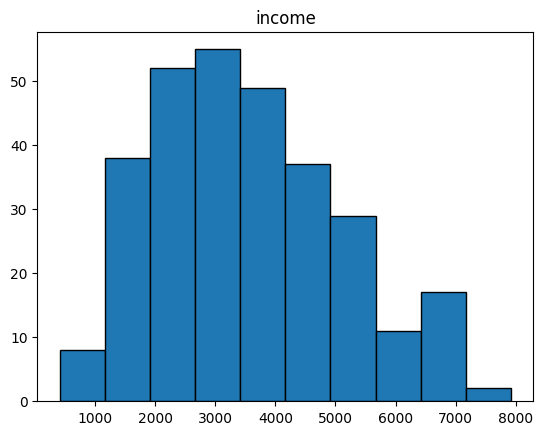

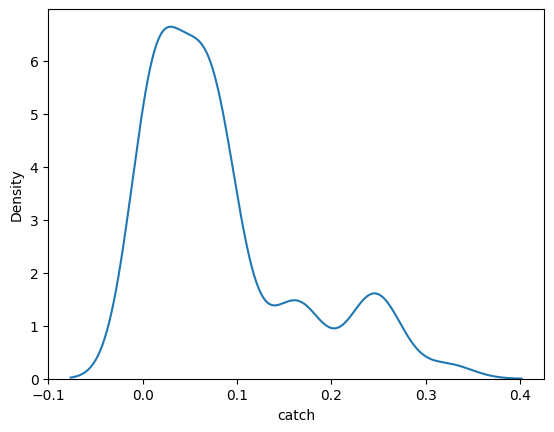

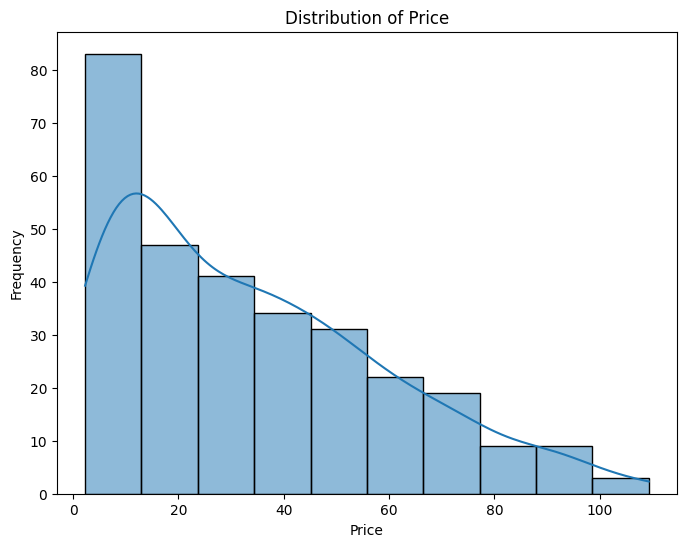

In [ ]:
#Print the number of inputs for each type of mode
print(df['mode'].value_counts())

#Print the income generated by all the modes combined
df.hist(column='income', grid=False, edgecolor='black')
plt.show()
sns.kdeplot(df['catch'])
plt.show()
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=10)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



Bivariate Analysis

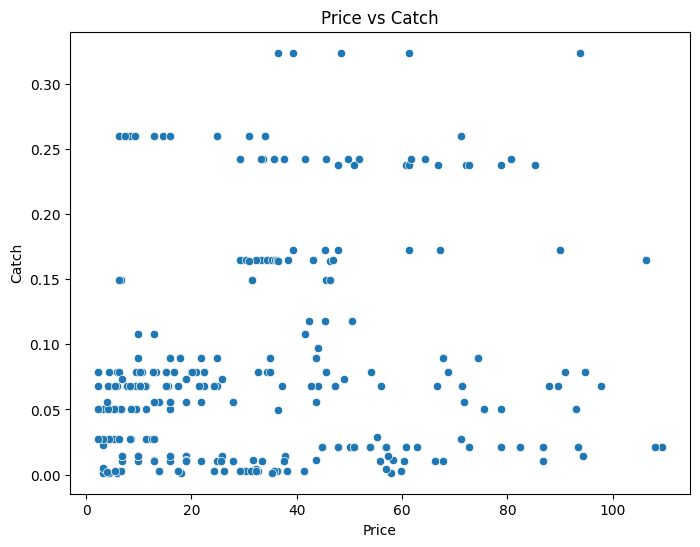

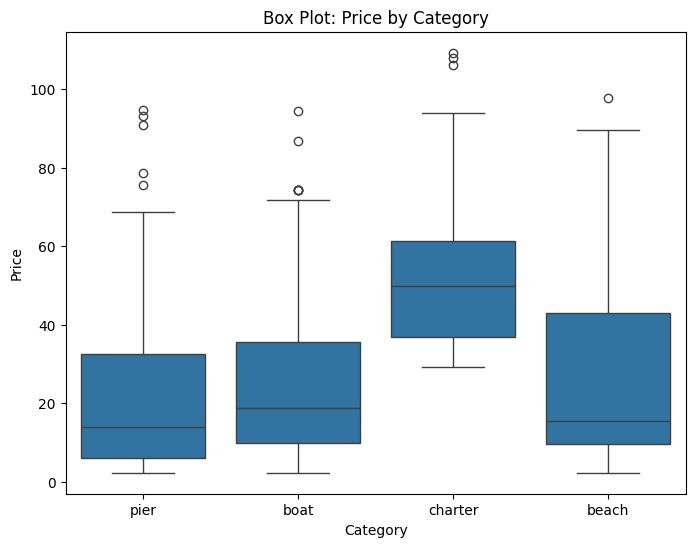

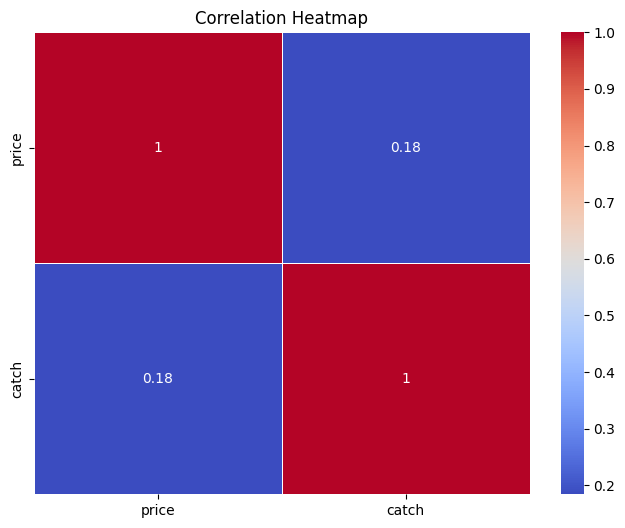

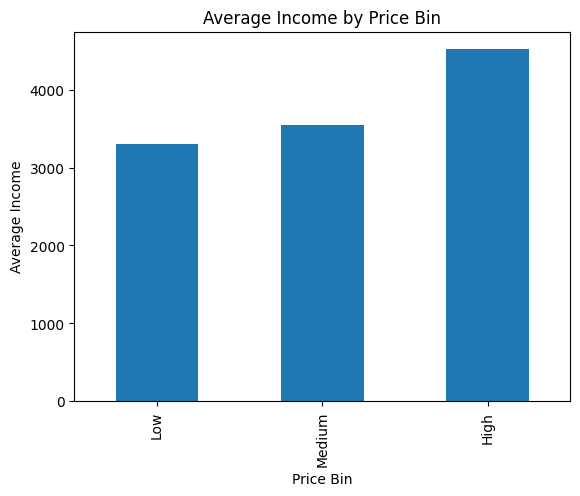

In [ ]:
# Scatter plot of Price vs Catch
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='catch', data=df)
plt.title('Price vs Catch')
plt.xlabel('Price')
plt.ylabel('Catch')
plt.show()

# Box plot of Price by Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='mode', y='price', data=df)
plt.title('Box Plot: Price by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(8, 6))
corr = df[['price', 'catch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




# Visualization of average income by price bin
average_income_by_price_bin.plot(kind='bar', title='Average Income by Price Bin')
plt.xlabel('Price Bin')
plt.ylabel('Average Income')
plt.show()

Multivariate Analysis

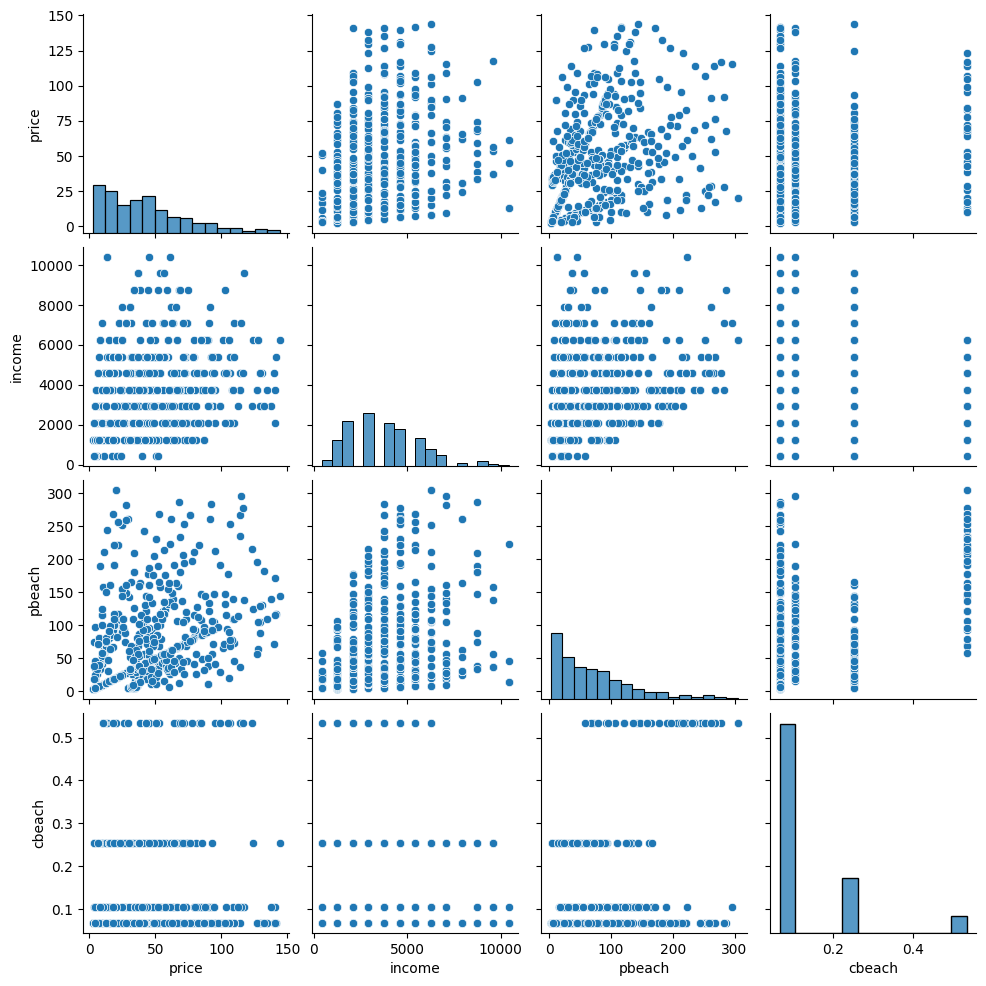

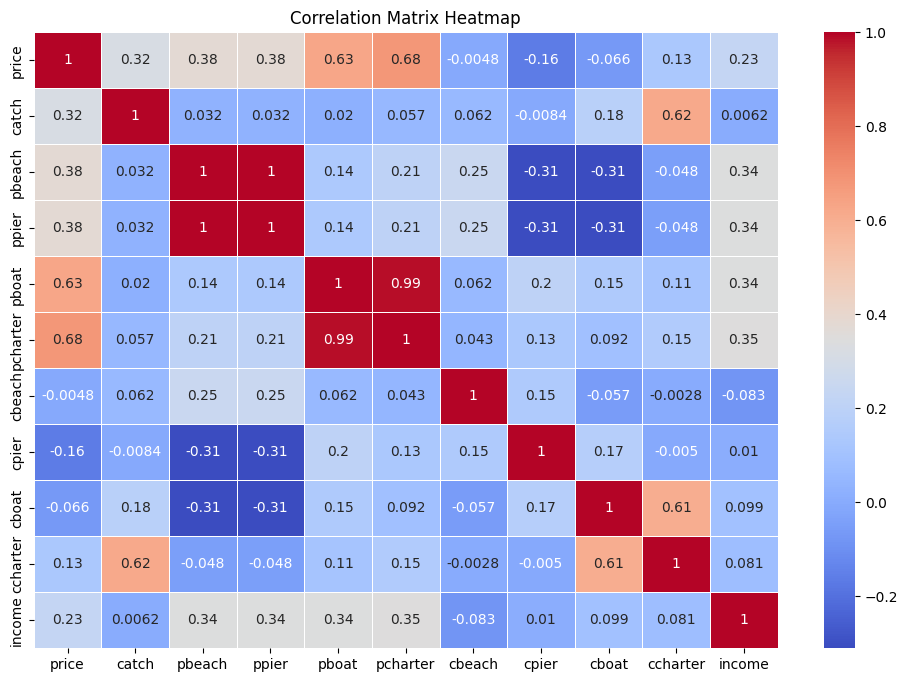

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


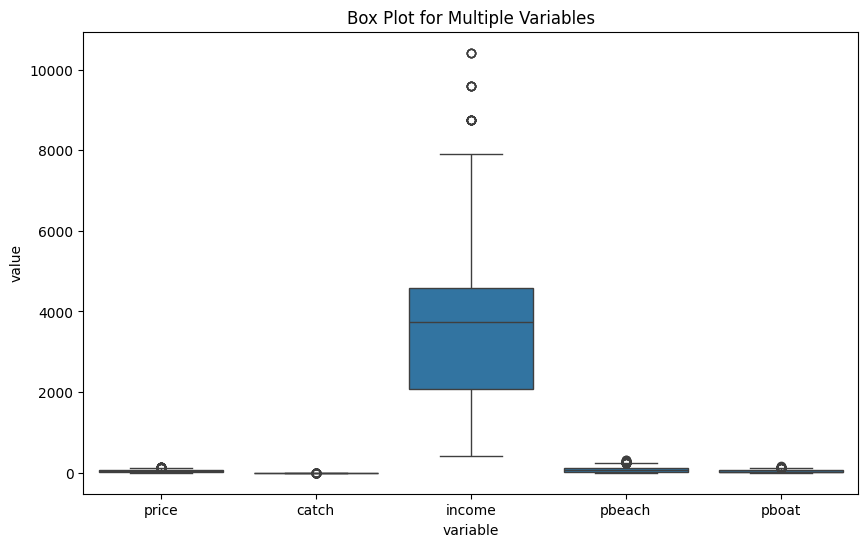

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

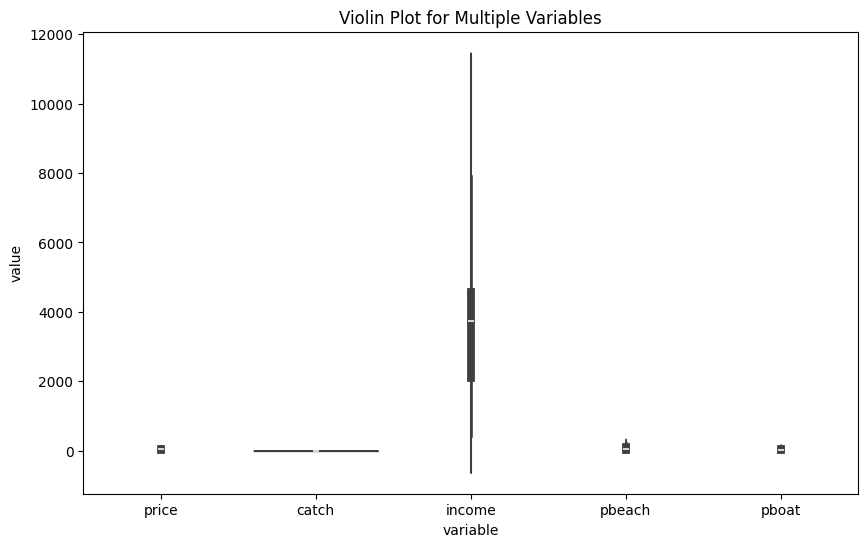

In [ ]:


# Pairplot for multivariate relationships
sns.pairplot(df[['price', 'income', 'pbeach', 'cbeach']])
plt.show()

# Select the relevant numerical columns for the heatmap
numerical_cols = ['price', 'catch', 'pbeach', 'ppier', 'pboat', 'pcharter', 'cbeach', 'cpier', 'cboat', 'ccharter', 'income']

# Generate the correlation matrix for the selected columns
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



# Melt the DataFrame to format it for the boxplot
df_melted = df.melt(value_vars=['price', 'catch', 'income', 'pbeach', 'pboat'])

# Create a box plot for the selected numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Box Plot for Multiple Variables')
plt.show()


# Create a violin plot for the selected numerical variables
plt.figure(figsize=(10, 6))
sns.violinplot(x='variable', y='value', data=df_melted)
plt.title('Violin Plot for Multiple Variables')
plt.show()


== Categorical Summary ==
Mode Counts:
 mode
boat       120
charter     87
pier        55
beach       36
Name: count, dtype: int64
Price Bin Counts:
 price_bin
Low       188
Medium     84
High       26
Name: count, dtype: int64


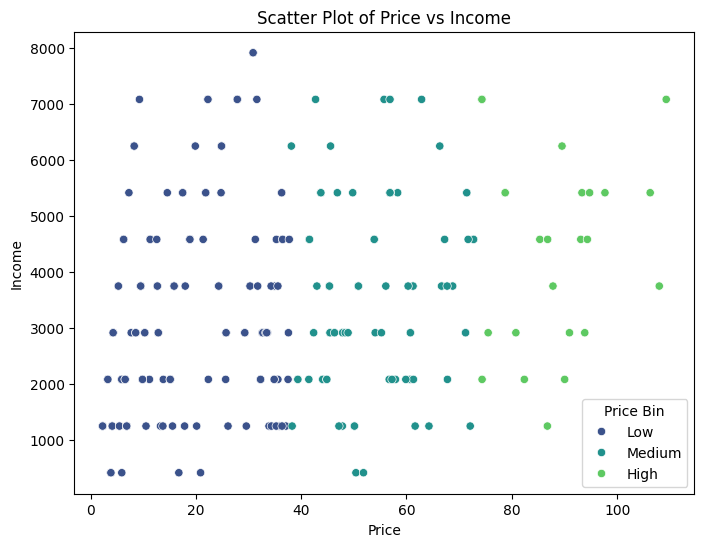

<ipython-input-27-ba265f72b511>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_bin', y='catch', palette='Set2')


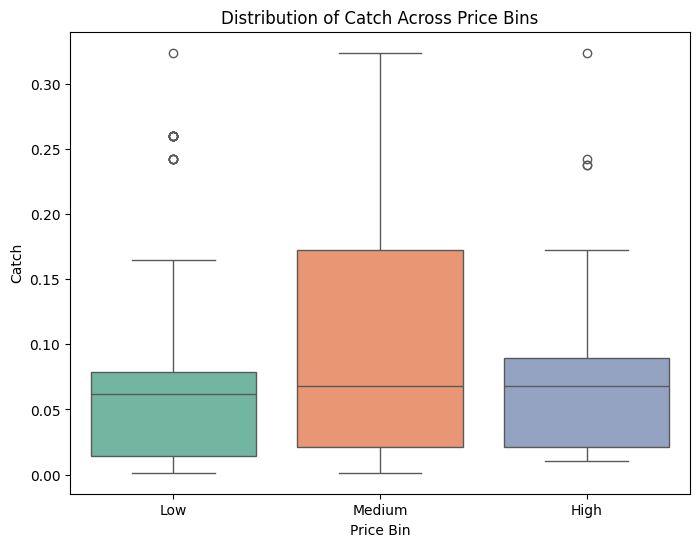

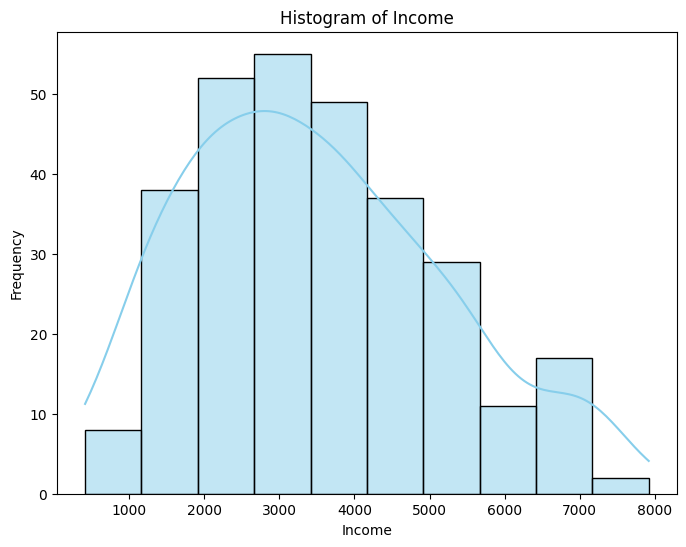

Contingency Table between price_bin and mode:
mode       beach  boat  charter  pier
price_bin                            
Low           26    94       23    45
Medium         7    20       52     5
High           3     6       12     5


In [ ]:
# Additional summary for categorical columns
print("\n== Categorical Summary ==")
print("Mode Counts:\n", df['mode'].value_counts())
print("Price Bin Counts:\n", df['price_bin'].value_counts())

#  Visualizing Numerical Relationships
# Scatter Plot of 'price' vs 'income' to observe relationship between price and income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='income', hue='price_bin', palette='viridis')
plt.title("Scatter Plot of Price vs Income")
plt.xlabel("Price")
plt.ylabel("Income")
plt.legend(title='Price Bin')
plt.show()

# Visualizing Distribution of 'catch' across Different Price Bins
# Box plot to see how 'catch' varies across 'price_bin' categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='price_bin', y='catch', palette='Set2')
plt.title("Distribution of Catch Across Price Bins")
plt.xlabel("Price Bin")
plt.ylabel("Catch")
plt.show()

# Histogram of Income
# This shows the distribution of the 'income' variable to understand its range and frequency
plt.figure(figsize=(8, 6))
sns.histplot(df['income'], bins=10, kde=True, color='skyblue')
plt.title("Histogram of Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()



# Create a contingency table in numerical format
contingency_table = pd.crosstab(df['price_bin'], df['mode'])

# Print the contingency table in numerical format
print("Contingency Table between price_bin and mode:")
print(contingency_table.to_string())


Stastical Analysis

In [ ]:
from scipy.stats import skew, kurtosis

# Extracting the columns into variables
price = df['price']
catch = df['catch']
income = df['income']
ccharter = df['ccharter']

# Central Tendency
mean_price = price.mean()
median_price = price.median()
mean_catch = catch.mean()
median_catch = catch.median()
mean_income = income.mean()
median_income = income.median()
mean_ccharter = ccharter.mean()
median_ccharter = ccharter.median()

# Dispersion
std_price = price.std()
var_price = price.var()
std_catch = catch.std()
var_catch = catch.var()
std_income = income.std()
var_income = income.var()
std_ccharter = ccharter.std()
var_ccharter = ccharter.var()

# Shape (Skewness and Kurtosis)
skew_price = skew(price)
kurt_price = kurtosis(price)
skew_catch = skew(catch)
kurt_catch = kurtosis(catch)
skew_income = skew(income)
kurt_income = kurtosis(income)
skew_ccharter = skew(ccharter)
kurt_ccharter = kurtosis(ccharter)

# Correlation Matrix
correlation_matrix = df[['price', 'catch', 'income', 'ccharter']].corr()


# Print results
print("Central Tendency ")
print("Mean of price:", mean_price)
print("Median of price:", median_price)
print("Mean of catch:", mean_catch)
print("Median of catch:", median_catch)
print("Mean of income:", mean_income)
print("Median of income:", median_income)
print("Mean of ccharter:", mean_ccharter)
print("Median of ccharter:", median_ccharter)

print("\nDispersion")
print("Standard Deviation of price:", std_price)
print("Variance of price:", var_price)
print("Standard Deviation of catch:", std_catch)
print("Variance of catch:", var_catch)
print("Standard Deviation of income:", std_income)
print("Variance of income:", var_income)
print("Standard Deviation of ccharter:", std_ccharter)
print("Variance of ccharter:", var_ccharter)

print("\nShape (Skewness and Kurtosis)")
print("Skewness of price:", skew_price)
print("Kurtosis of price:", kurt_price)
print("Skewness of catch:", skew_catch)
print("Kurtosis of catch:", kurt_catch)
print("Skewness of income:", skew_income)
print("Kurtosis of income:", kurt_income)
print("Skewness of ccharter:", skew_ccharter)
print("Kurtosis of ccharter:", kurt_ccharter)

print("\nCorrelation Matrix")
print(correlation_matrix)



Central Tendency 
Mean of price: 33.778489932885904
Median of price: 29.29
Mean of catch: 0.08252885906040268
Median of catch: 0.0678
Mean of income: 3473.1540753020136
Median of income: 2916.6666
Mean of ccharter: 0.2789006711409396
Median of ccharter: 0.2377

Dispersion
Standard Deviation of price: 25.511788562904595
Variance of price: 650.8513556783497
Standard Deviation of catch: 0.0809435175687609
Variance of catch: 0.006551853036404305
Standard Deviation of income: 1726.0130428979494
Variance of income: 2979121.0242538387
Standard Deviation of ccharter: 0.2862485070895494
Variance of ccharter: 0.08193820781099581

Shape (Skewness and Kurtosis)
Skewness of price: 0.7920207405866126
Kurtosis of price: -0.15920796658934488
Skewness of catch: 1.241441754832607
Kurtosis of catch: 0.5832285219419289
Skewness of income: 0.446289329646717
Kurtosis of income: -0.48103766912825296
Skewness of ccharter: 1.0366764461137725
Kurtosis of ccharter: 0.622658407707569

Correlation Matrix
         

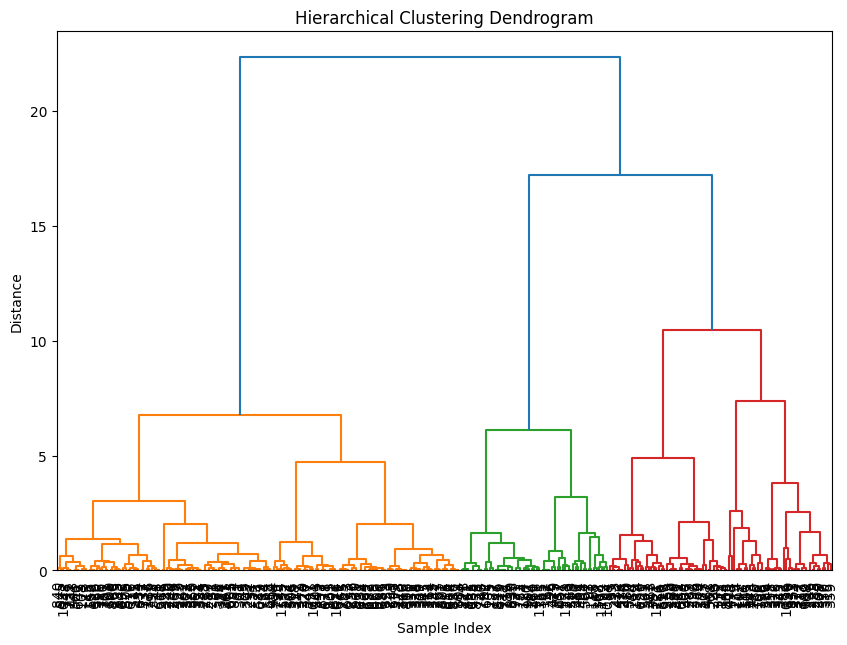

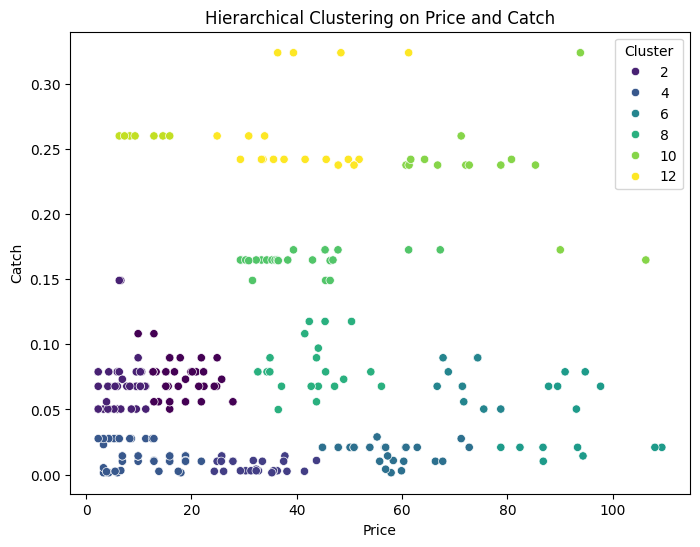

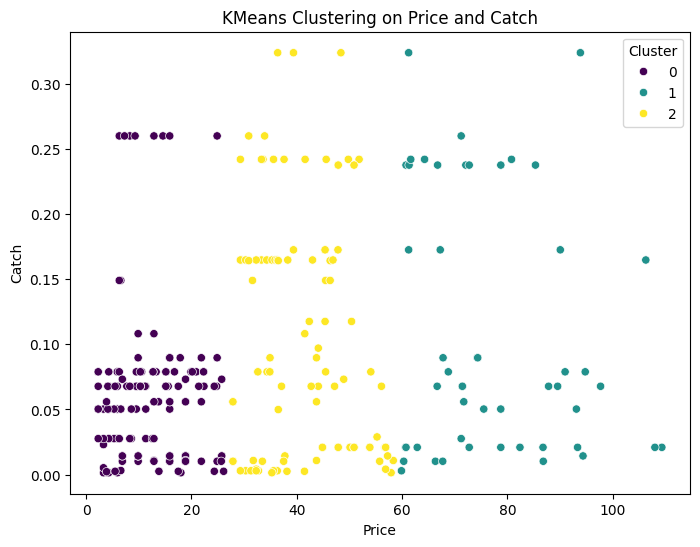

Outlier Counts:
 outlier
Inlier    298
Name: count, dtype: int64


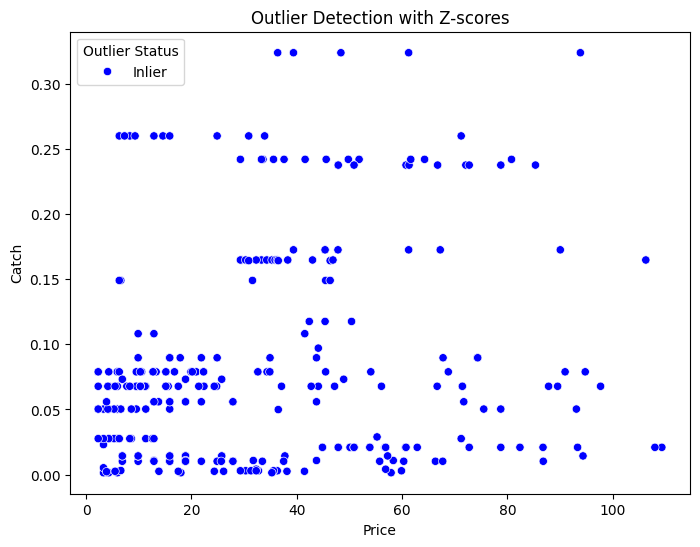

In [ ]:
# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Scale data for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['price', 'catch']])

# Perform hierarchical clustering
# Using the 'ward' method to minimize variance within clusters
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Assign clusters from the dendrogram
# Choose the number of clusters by specifying a threshold distance
df['hierarchical_cluster'] = fcluster(linkage_matrix, t=3, criterion='distance')  # t=3 is an example threshold

# Visualize the clusters in a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='catch', hue='hierarchical_cluster', palette='viridis')
plt.title(" Clustering on Price and Catch")
plt.xlabel("Price")
plt.ylabel("Catch")
plt.legend(title='Cluster')
plt.show()


#  KMeans Clustering
# Using KMeans for clustering based on 'price' and 'catch'
X = df[['price', 'catch']]
kmeans = KMeans(n_clusters=3, random_state=42)  # Added random_state for reproducibility
df['cluster'] = kmeans.fit_predict(X)

# Visualizing Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='catch', hue='cluster', palette='viridis')
plt.title("KMeans Clustering on Price and Catch")
plt.xlabel("Price")
plt.ylabel("Catch")
plt.legend(title='Cluster')
plt.show()



# Calculate Z-scores for each value in the 'price' and 'catch' columns
from scipy.stats import zscore

# Create a new column 'price_zscore' and 'catch_zscore' for the Z-scores
df['price_zscore'] = zscore(df['price'])
df['catch_zscore'] = zscore(df['catch'])

# Define an outlier as any row where the absolute Z-score is greater than 3 for either column
df['outlier'] = ((df['price_zscore'].abs() > 3) | (df['catch_zscore'].abs() > 3)).apply(lambda x: 'Outlier' if x else 'Inlier')

# Display counts of inliers and outliers
print("Outlier Counts:\n", df['outlier'].value_counts())

# Visualize the outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='catch', hue='outlier', palette={'Inlier': 'blue', 'Outlier': 'red'})
plt.title("Outlier Detection with Z-scores")
plt.xlabel("Price")
plt.ylabel("Catch")
plt.legend(title='Outlier Status')
plt.show()


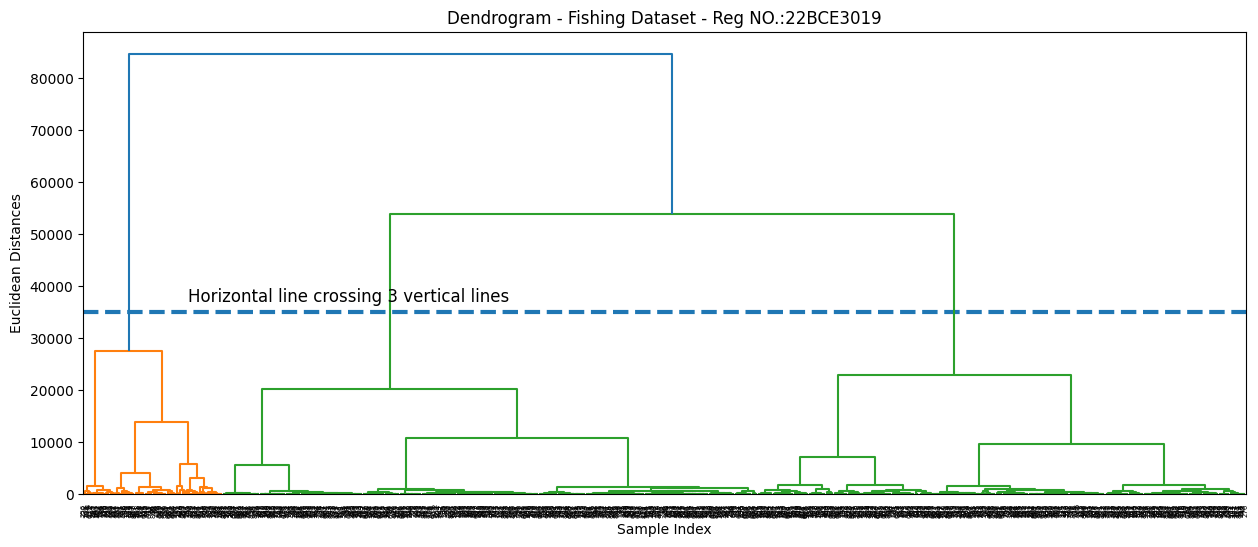

In [7]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

X = df[['price', 'catch', 'pbeach', 'ppier', 'pboat', 'pcharter', 'cbeach', 'cpier', 'cboat', 'ccharter', 'income']].values

sample_indices = np.random.choice(X.shape[0], min(1000, X.shape[0]), replace=False)
X_sampled = X[sample_indices]

# Plotting the dendrogram
plt.figure(figsize=(15, 6))
plt.title('Dendrogram - Fishing Dataset - Reg NO.:22BCE3019')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distances')

plt.hlines(y=35000, xmin=0, xmax=12000, lw=3, linestyles='--')
plt.text(x=900, y=37000, s='Horizontal line crossing 3 vertical lines', fontsize=12)
dendrogram = sch.dendrogram(sch.linkage(X_sampled, method='ward'))
plt.show()


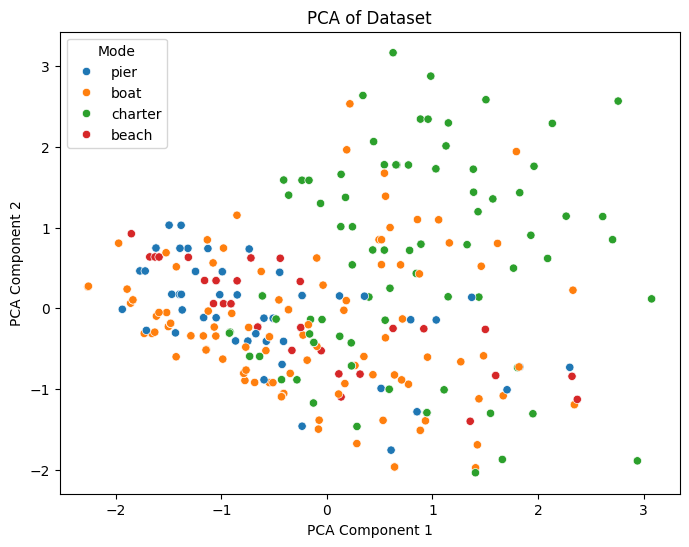

In [ ]:
# Scaling data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['price', 'catch', 'income']])

# Applying PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plotting PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='mode')
plt.title("PCA of Dataset")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Mode')
plt.show()


Explained variance ratio for each component: [0.31179512 0.25672764]


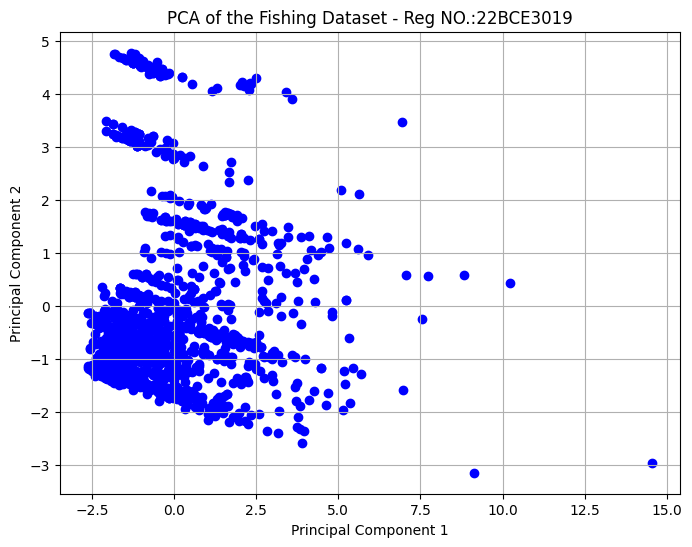

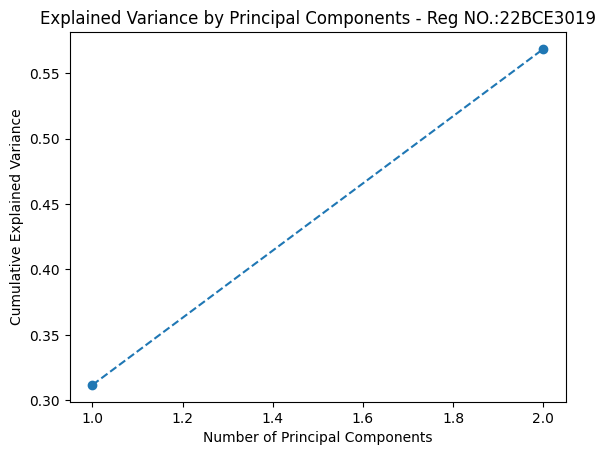

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features = ['price', 'catch', 'pbeach', 'ppier', 'pboat', 'pcharter', 'cbeach', 'cpier', 'cboat', 'ccharter', 'income']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for each component
print("Explained variance ratio for each component:", pca.explained_variance_ratio_)

# Plotting the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o')
plt.title("PCA of the Fishing Dataset - Reg NO.:22BCE3019")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

# Cumulative explained variance plot
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components - Reg NO.:22BCE3019')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()



Mean Squared Error: 2787606.4557497315
R-squared: 0.061135041745184804


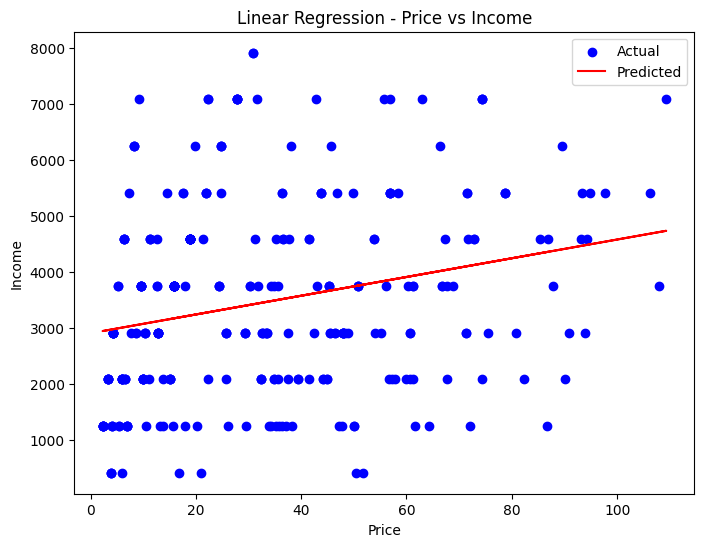

In [ ]:
# Model Development and Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Simple Linear Regression Model: Predicting 'income' based on 'price'
X = df[['price']]
y = df['income']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation of the Model
print("Mean Squared Error:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

# Visualization of Regression Line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title("Linear Regression - Price vs Income")
plt.xlabel("Price")
plt.ylabel("Income")
plt.legend()
plt.show()
